In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/dataset.csv', index_col='Date', parse_dates=True)

In [3]:
dataset.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


<AxesSubplot:xlabel='Date'>

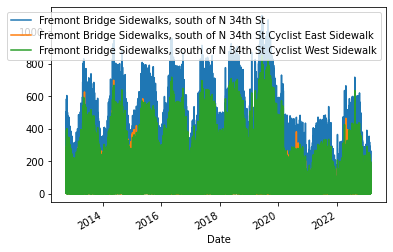

In [4]:
%matplotlib inline
dataset.plot()

data is very densed, so to get the data show the actual increments and decrement

<AxesSubplot:xlabel='Date'>

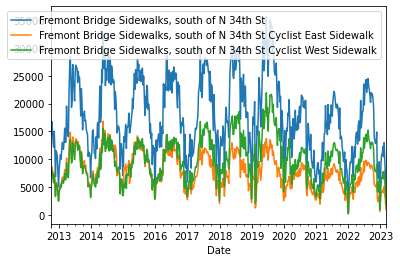

In [5]:
%matplotlib inline
dataset.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

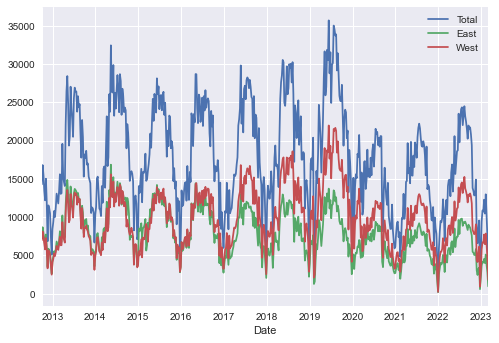

In [6]:
# change the stype

plt.style.use('seaborn')
dataset.columns = ['Total','East','West']
dataset.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

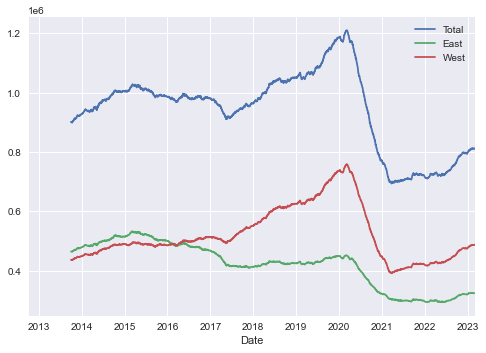

In [7]:
# check for annual rise and falls
dataset.resample('D').sum().rolling(365).sum().plot()

(0.0, 1256022.05)

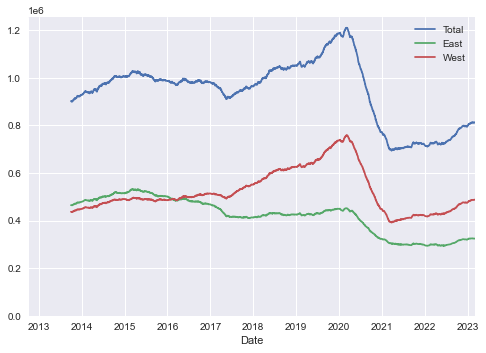

In [8]:
ax = dataset.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

Take a look at trends within the individual days

<AxesSubplot:xlabel='time'>

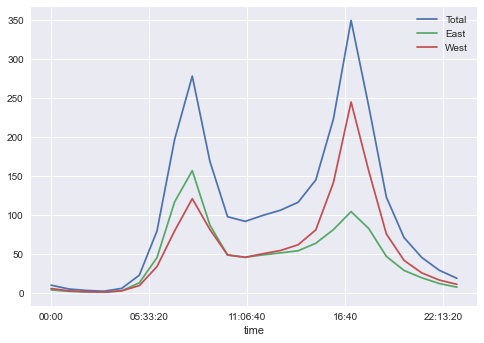

In [9]:
dataset.groupby(dataset.index.time).mean().plot()

In [10]:
# make a pivotable 
pivoted = dataset.pivot_table('Total', index= dataset.index.time, columns=dataset.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

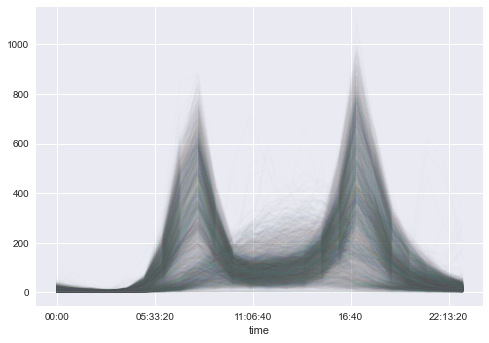

In [11]:
pivoted.plot(legend=False, alpha=0.01)